In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from stimuli import StimulusGenerator
from area import Area
from brain import Brain
from utils import *

In [2]:
B = Brain(num_areas=2, num_neurons=1000, cap_size=100, p=0.1, beta=0.1)

coreset = np.arange(B.cap_size)
x0 = np.zeros(B.num_neurons)
x0[coreset] = 1.
S = StimulusGenerator(B.num_neurons, B.cap_size, background_p=0.01, coreset=coreset)

y0, W_yy, W_yx = B.project_stream(S,0,1, max_iterations=100, return_weights_assembly=True)

In [3]:
U,S,Vt = np.linalg.svd(W_yx)
Ur,Sr,Vrt = np.linalg.svd(W_yy)

x_dist = np.array([hamming(x0, capk(np.absolute(Vt[i]), B.cap_size)) for i in range(B.num_neurons)])
y_dist = np.array([hamming(y0, capk(np.absolute(U[:,i]), B.cap_size)) for i in range(B.num_neurons)])

yrv_dist = np.array([hamming(y0, capk(np.absolute(Vrt[i]), B.cap_size)) for i in range(B.num_neurons)])
yru_dist = np.array([hamming(y0, capk(np.absolute(Ur[:,i]), B.cap_size)) for i in range(B.num_neurons)])
idxs = np.arange(1, B.num_neurons+1)

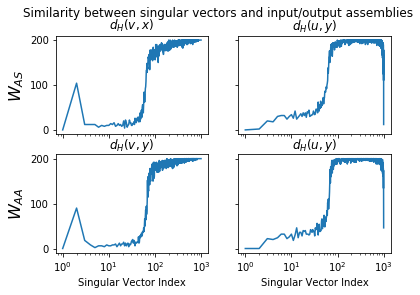

In [4]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6,4))
fig.suptitle('Similarity between singular vectors and input/output assemblies')
ax1.semilogx(idxs, x_dist)
ax1.set_ylabel('$W_{AS}$', fontsize=16)
ax1.set_title('$d_H(v, x)$')
ax2.semilogx(idxs, y_dist)
ax2.set_title('$d_H(u, y)$')
ax3.semilogx(idxs, yrv_dist)
ax3.set_ylabel('$W_{AA}$', fontsize=16)
ax3.set_xlabel('Singular Vector Index')
ax3.set_title('$d_H(v, y)$')
ax4.semilogx(idxs, yru_dist)
ax4.set_xlabel('Singular Vector Index')
ax4.set_title('$d_H(u, y)$')

for ax in fig.get_axes():
    ax.label_outer()

plt.savefig('am_assembly.pdf')

In [5]:
B = Brain(num_areas=2, num_neurons=1000, cap_size=100, p=0.1, beta=0.1)

coreset_1 = np.arange(B.cap_size)
coreset_2 = np.arange(3*B.cap_size, 4*B.cap_size)
S1 = StimulusGenerator(B.num_neurons, B.cap_size, background_p=0.01, coreset=coreset_1)
S2 = StimulusGenerator(B.num_neurons, B.cap_size, background_p=0.01, coreset=coreset_2)

y1, W_yy1, W_yx1 = B.project_stream(S1,0,1, max_iterations=50, return_weights_assembly=True)
y2, W_yy2, W_yx2 = B.project_stream(S2,0,1, max_iterations=50, initialize=False, return_weights_assembly=True)

In [6]:
X1 = S1.sample_stimuli(100)
X2 = S2.sample_stimuli(100)

In [7]:
y_new_1 = capk(W_yx2.dot(X1[:,0]), B.cap_size)
y_new_2 = capk(W_yx2.dot(X2[:,0]), B.cap_size)
print(hamming(y_new_1, y_new_2))

200.0


<BarContainer object of 1000 artists>

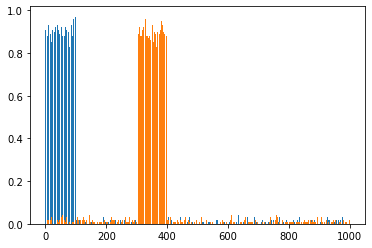

In [8]:
plt.bar(np.arange(B.num_neurons), X1.mean(axis=1))
plt.bar(np.arange(B.num_neurons), X2.mean(axis=1))

In [10]:
Y1 = B.create_assemblies(X1,0,1)
Y2 = B.create_assemblies(X2,0,1)

<BarContainer object of 1000 artists>

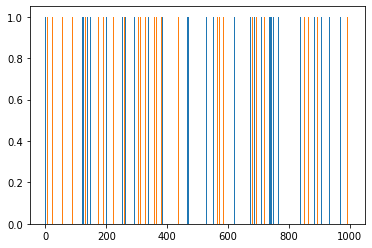

In [11]:
plt.bar(np.arange(B.num_neurons), Y1.mean(axis=1))
plt.bar(np.arange(B.num_neurons), Y2.mean(axis=1))


In [12]:
# W_yx /= W_yx.sum(axis=1)[:,np.newaxis]

x1 = np.zeros(B.num_neurons)
x1[coreset_1] = 1.
x2 = np.zeros(B.num_neurons)
x2[coreset_2] = 1.

U1,S1,Vt1 = np.linalg.svd(W_yx2)
Ur1,Sr1,Vrt1 = np.linalg.svd(W_yy2)

x_dist1 = np.array([hamming(x1, capk(np.absolute(Vt1[i]), B.cap_size)) for i in range(B.num_neurons)])
y_dist1 = np.array([hamming(y_new_1, capk(np.absolute(U1[:,i]), B.cap_size)) for i in range(B.num_neurons)])
x_dist2 = np.array([hamming(x2, capk(np.absolute(Vt1[i]), B.cap_size)) for i in range(B.num_neurons)])
y_dist2 = np.array([hamming(y_new_2, capk(np.absolute(U1[:,i]), B.cap_size)) for i in range(B.num_neurons)])

yrv_dist1 = np.array([hamming(y_new_1, capk(np.absolute(Vrt1[i]), B.cap_size)) for i in range(B.num_neurons)])
yru_dist1 = np.array([hamming(y_new_1, capk(np.absolute(Ur1[:,i]), B.cap_size)) for i in range(B.num_neurons)])
yrv_dist2 = np.array([hamming(y_new_2, capk(np.absolute(Vrt1[i]), B.cap_size)) for i in range(B.num_neurons)])
yru_dist2 = np.array([hamming(y_new_2, capk(np.absolute(Ur1[:,i]), B.cap_size)) for i in range(B.num_neurons)])

x_idxs1 = np.argsort(x_dist1)
x_idxs2 = np.argsort(x_dist2)
x_sort_order = np.concatenate([x_idxs1[:B.cap_size//2], x_idxs2[:B.cap_size//2], np.setdiff1d(x_idxs1[B.cap_size//2:], x_idxs2[:B.cap_size//2])])

y_idxs1 = np.argsort(y_dist1)
y_idxs2 = np.argsort(y_dist2)
y_sort_order = np.concatenate([y_idxs1[:B.cap_size//2], y_idxs2[:B.cap_size//2], np.setdiff1d(y_idxs1[B.cap_size//2:], y_idxs2[:B.cap_size//2])])

yrv_idxs1 = np.argsort(yrv_dist1)
yrv_idxs2 = np.argsort(yrv_dist2)
yrv_sort_order = np.concatenate([yrv_idxs1[:B.cap_size//2], yrv_idxs2[:B.cap_size//2], np.setdiff1d(yrv_idxs1[B.cap_size//2:], yrv_idxs2[:B.cap_size//2])])

yru_idxs1 = np.argsort(yru_dist1)
yru_idxs2 = np.argsort(yru_dist2)
yru_sort_order = np.concatenate([yru_idxs1[:B.cap_size//2], yru_idxs2[:B.cap_size//2], np.setdiff1d(yru_idxs1[B.cap_size//2:], yru_idxs2[:B.cap_size//2])])

sv_idxs = np.arange(1, B.num_neurons+1)

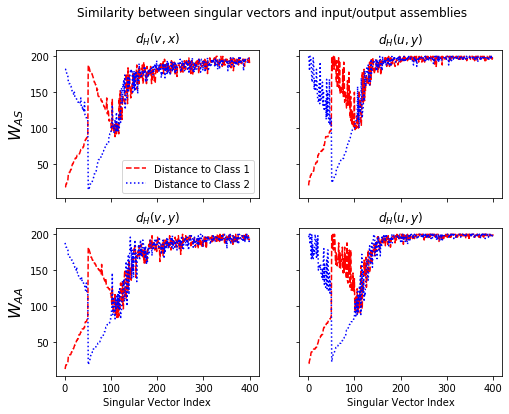

In [14]:
plt_limit = 400
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,6))
fig.suptitle('Similarity between singular vectors and input/output assemblies')
ax1.plot(sv_idxs[:plt_limit], x_dist1[x_sort_order[:plt_limit]], 'r--', label='Distance to Class 1')
ax1.plot(sv_idxs[:plt_limit], x_dist2[x_sort_order[:plt_limit]], 'b:', label='Distance to Class 2')
ax1.legend(loc='lower right')
ax1.set_ylabel('$W_{AS}$', fontsize=16)
ax1.set_title('$d_H(v, x)$')
ax2.plot(sv_idxs[:plt_limit], y_dist1[y_sort_order[:plt_limit]], 'r--')
ax2.plot(sv_idxs[:plt_limit], y_dist2[y_sort_order[:plt_limit]], 'b:')
ax2.set_title('$d_H(u, y)$')
ax3.plot(sv_idxs[:plt_limit], yrv_dist1[yrv_sort_order[:plt_limit]], 'r--')
ax3.plot(sv_idxs[:plt_limit], yrv_dist2[yrv_sort_order[:plt_limit]], 'b:')
ax3.set_ylabel('$W_{AA}$', fontsize=16)
ax3.set_xlabel('Singular Vector Index')
ax3.set_title('$d_H(v, y)$')
ax4.plot(sv_idxs[:plt_limit], yru_dist1[yru_sort_order[:plt_limit]], 'r--')
ax4.plot(sv_idxs[:plt_limit], yru_dist2[yru_sort_order[:plt_limit]], 'b:')
ax4.set_xlabel('Singular Vector Index')
ax4.set_title('$d_H(u, y)$')

for ax in fig.get_axes():
    ax.label_outer()

# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc = 'upper center', bbox_to_anchor = (-0.25, -0.05, 1, 1), bbox_transform = plt.gcf().transFigure)


plt.savefig('am_assembly_binary.pdf')

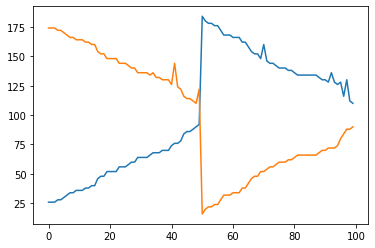

In [47]:
idxs1 = np.argsort(x_dist1)
idxs2 = np.argsort(x_dist2)
sort_order = np.concatenate([idxs1[:B.cap_size//2], idxs2[:B.cap_size//2], np.setdiff1d(idxs1[B.cap_size//2:], idxs2[:B.cap_size//2])])
plt.plot(x_dist1[sort_order[:B.cap_size]]); plt.plot(x_dist2[sort_order[:B.cap_size]])
# plt.plot(x_dist1[idxs[:B.cap_size]]); plt.plot(x_dist2[idxs[:B.cap_size]])

In [39]:
len(set(idxs1[100:]).intersection(set(idxs2[100:])))

868

In [43]:
sort_order = np.concatenate([idxs1[:50], idxs2[:50], np.setdiff1d(idxs1[50:], idxs2[:50])])
len(sort_order)

1000

In [23]:
B = Brain(num_areas=2, num_neurons=1000, cap_size=100, p=0.1, beta=0.05)
n_classes = 4
generators = []
for i in range(n_classes):
    generators.append(StimulusGenerator(B.num_neurons, B.cap_size, background_p=0.01, coreset=np.arange(i*B.cap_size, (i+1)*B.cap_size)))

res = []
for i in range(n_classes):
    if i==0:
        res.append(B.project_stream(generators[i],0,1, max_iterations=50, return_weights_assembly=True))
    else:
        res.append(B.project_stream(generators[i],0,1, max_iterations=50, initialize=False, return_weights_assembly=True))



In [24]:
ys = [res[i][0] for i in range(n_classes)]
Xs = [g.sample_stimuli(100) for g in generators]
Ys = [B.create_assemblies(X,0,1) for X in Xs]

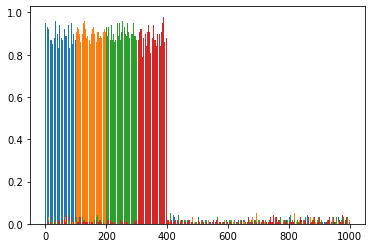

In [25]:
for i in range(n_classes):
    plt.bar(np.arange(B.num_neurons), Xs[i].mean(axis=1))

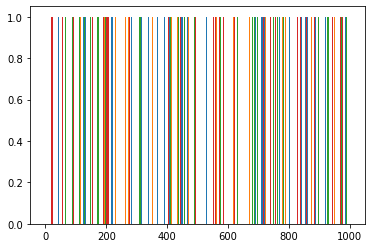

In [26]:
for i in range(n_classes):
    plt.bar(np.arange(B.num_neurons), Ys[i].mean(axis=1))

In [27]:
for i in range(n_classes):
    for j in range(i+1,n_classes):
        print(hamming(ys[i], ys[j]))

200.0
200.0
200.0
200.0
200.0
200.0


In [28]:
X = np.zeros((n_classes, B.num_neurons))
for i,g in enumerate(generators):
    X[i,g.coreset] = 1.

_, W_yy4, W_yx4 = res[-1]

U4,S4,Vt4 = np.linalg.svd(W_yx4)
Ur4,Sr4,Vrt4 = np.linalg.svd(W_yy4)

x_dists = []
y_dists = []
yrv_dists = []
yru_dists = []
for j in range(n_classes):
    x_dists.append(np.array([hamming(X[j], capk(np.absolute(Vt4[i]), B.cap_size)) for i in range(B.num_neurons)]))
    y_dists.append(np.array([hamming(ys[j], capk(np.absolute(U4[:,i]), B.cap_size)) for i in range(B.num_neurons)]))
    yrv_dists.append(np.array([hamming(ys[j], capk(np.absolute(Vrt4[i]), B.cap_size)) for i in range(B.num_neurons)]))
    yru_dists.append(np.array([hamming(ys[j], capk(np.absolute(Ur4[:,i]), B.cap_size)) for i in range(B.num_neurons)]))

x_idxs = [np.argsort(x) for x in x_dists]
y_idxs = [np.argsort(x) for x in y_dists]
yrv_idxs = [np.argsort(x) for x in yrv_dists]
yru_idxs = [np.argsort(x) for x in yru_dists]

x_sort_order = []
for x_idx in x_idxs:
    x_sort_order.append(x_idx[:B.cap_size//n_classes])
x_exclude = x_idxs[0][:B.cap_size//n_classes]
for j in range(1, n_classes):
    x_exclude = np.union1d(x_exclude, x_idxs[j][:B.cap_size//n_classes])
x_sort_order.append(np.setdiff1d(x_idxs[0][B.cap_size//n_classes:], x_exclude))
x_sort_order = np.concatenate(x_sort_order)


y_sort_order = []
for y_idx in y_idxs:
    y_sort_order.append(y_idx[:B.cap_size//n_classes])
y_exclude = y_idxs[0][:B.cap_size//n_classes]
for j in range(1, n_classes):
    y_exclude = np.union1d(y_exclude, y_idxs[j][:B.cap_size//n_classes])
y_sort_order.append(np.setdiff1d(y_idxs[0][B.cap_size//n_classes:], y_exclude))
y_sort_order = np.concatenate(y_sort_order)

yrv_sort_order = []
for yrv_idx in yrv_idxs:
    yrv_sort_order.append(yrv_idx[:B.cap_size//n_classes])
yrv_exclude = yrv_idxs[0][:B.cap_size//n_classes]
for j in range(1, n_classes):
    yrv_exclude = np.union1d(yrv_exclude, yrv_idxs[j][:B.cap_size//n_classes])
yrv_sort_order.append(np.setdiff1d(yrv_idxs[0][B.cap_size//n_classes:], yrv_exclude))
yrv_sort_order = np.concatenate(yrv_sort_order)

yru_sort_order = []
for yru_idx in yru_idxs:
    yru_sort_order.append(yru_idx[:B.cap_size//n_classes])
yru_exclude = yru_idxs[0][:B.cap_size//n_classes]
for j in range(1, n_classes):
    yru_exclude = np.union1d(yru_exclude, yru_idxs[j][:B.cap_size//n_classes])
yru_sort_order.append(np.setdiff1d(yru_idxs[0][B.cap_size//n_classes:], yru_exclude))
yru_sort_order = np.concatenate(yru_sort_order)

sv_idxs = np.arange(1, B.num_neurons+1)

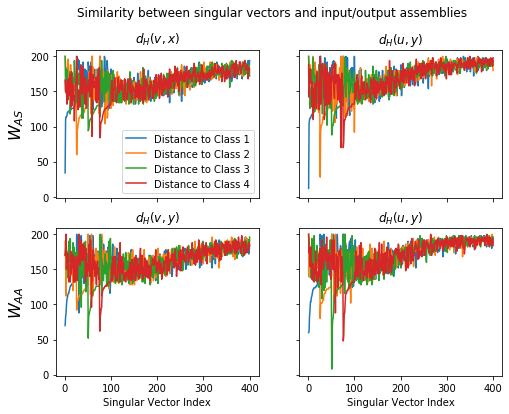

In [29]:
plt_limit = 400
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8,6))
fig.suptitle('Similarity between singular vectors and input/output assemblies')
for i in range(n_classes):
    ax1.plot(sv_idxs[:plt_limit], x_dists[i][x_sort_order[:plt_limit]], label='Distance to Class %d'%(i+1))

# ax1.plot(sv_idxs[:plt_limit], x_dist1[x_sort_order[:plt_limit]], 'r--', label='Distance to Class 1')
# ax1.plot(sv_idxs[:plt_limit], x_dist2[x_sort_order[:plt_limit]], 'b:', label='Distance to Class 2')
ax1.legend(loc='lower right')
ax1.set_ylabel('$W_{AS}$', fontsize=16)
ax1.set_title('$d_H(v, x)$')

# ax2.plot(sv_idxs[:plt_limit], y_dist1[y_sort_order[:plt_limit]], 'r--')
# ax2.plot(sv_idxs[:plt_limit], y_dist2[y_sort_order[:plt_limit]], 'b:')
for i in range(n_classes):
    ax2.plot(sv_idxs[:plt_limit], y_dists[i][y_sort_order[:plt_limit]])
ax2.set_title('$d_H(u, y)$')

# ax3.plot(sv_idxs[:plt_limit], yrv_dist1[yrv_sort_order[:plt_limit]], 'r--')
# ax3.plot(sv_idxs[:plt_limit], yrv_dist2[yrv_sort_order[:plt_limit]], 'b:')
for i in range(n_classes):
    ax3.plot(sv_idxs[:plt_limit], yrv_dists[i][yrv_sort_order[:plt_limit]])
ax3.set_ylabel('$W_{AA}$', fontsize=16)
ax3.set_xlabel('Singular Vector Index')
ax3.set_title('$d_H(v, y)$')

# ax4.plot(sv_idxs[:plt_limit], yru_dist1[yru_sort_order[:plt_limit]], 'r--')
# ax4.plot(sv_idxs[:plt_limit], yru_dist2[yru_sort_order[:plt_limit]], 'b:')
for i in range(n_classes):
    ax4.plot(sv_idxs[:plt_limit], yru_dists[i][yru_sort_order[:plt_limit]])
ax4.set_xlabel('Singular Vector Index')
ax4.set_title('$d_H(u, y)$')

for ax in fig.get_axes():
    ax.label_outer()

# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels, loc = 'upper center', bbox_to_anchor = (-0.25, -0.05, 1, 1), bbox_transform = plt.gcf().transFigure)


plt.savefig('am_assembly_4_class.pdf')

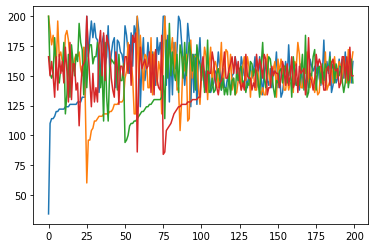

In [30]:
idxs = [np.argsort(x) for x in x_dists]

sort_order = []
for idx in idxs:
    sort_order.append(idx[:B.cap_size//n_classes])

exclude = idxs[0][:B.cap_size//n_classes]
for j in range(1, n_classes):
    exclude = np.union1d(exclude, idxs[j][:B.cap_size//n_classes])

sort_order.append(np.setdiff1d(idxs[0][B.cap_size//n_classes:], exclude))

sort_order = np.concatenate(sort_order)

for i in range(n_classes):
    plt.plot(x_dists[i][sort_order[:2*B.cap_size]])

# for i in range(n_classes):
#     plt.plot(x_dists[i][idxs[2][:B.cap_size//4]])

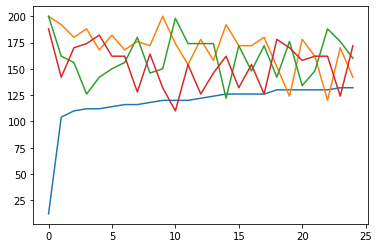

In [31]:
y_idxs = [np.argsort(y) for y in y_dists]

for i in range(n_classes):
    plt.plot(y_dists[i][y_idxs[0][:B.cap_size//4]])